In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pickle
import pandas as pd
from skimage.transform import resize

import jaxley as jx
from nex.fig4_rgc.utils.utils import build_kernel
from nex.colors import cols as papercols

In [3]:
import time
import IPython.display as IPd
from svgutils.compose import *

# Task illustration

In [140]:
all_dfs = pd.read_pickle("../results/data/setup.pkl")


with open("../results/01_illustration/bc_output.pkl", "rb") as handle:
    bc_output = pickle.load(handle)

with open("../results/01_illustration/recordings.pkl", "rb") as handle:
    recordings = pickle.load(handle)

with open("../results/01_illustration/kernel_x.pkl", "rb") as handle:
    X = pickle.load(handle)

with open("../results/01_illustration/kernel_y.pkl", "rb") as handle:
    Y = pickle.load(handle)

with open("../results/01_illustration/kernel_z.pkl", "rb") as handle:
    kernel = pickle.load(handle)


with open("../results/01_illustration/nonlinearity_inputs.pkl", "rb") as handle:
    inputs = pickle.load(handle)

with open("../results/01_illustration/nonlinearity_vals.pkl", "rb") as handle:
    vals = pickle.load(handle)

cell_id = "20161028_1"
cell = jx.read_swc(f"../data/{cell_id}.swc", nseg=4, max_branch_len=300.0, min_radius=5.0)

/Users/michaeldeistler/Documents/phd/jaxley/jaxley/utils/swc.py:181: UserWarning: Found a soma which consists of a single traced point. `Jaxley` interprets this soma as a spherical compartment with radius specified in the SWC file, i.e. with surface area 4*pi*r*r.
  warn(
/Users/michaeldeistler/Documents/phd/jaxley/jaxley/utils/swc.py:32: UserWarning: Found a segment with length 0. Clipping it to 1.0
  warn("Found a segment with length 0. Clipping it to 1.0")


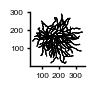

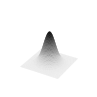

In [141]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(1, 1), subplot_kw={"projection": "3d"})
    ax.plot_surface(X, Y, kernel, cmap="Greys", clim=[-0.0001, 0.0005])
    ax.set_axis_off()
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.savefig("../svg/panel_a2.svg", bbox_inches="tight", transparent=True)
    plt.show()

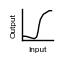

In [142]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(0.4, 0.4))
    _ = ax.plot(inputs, vals, c="k")
    _ = ax.set_xticks([])
    _ = ax.set_yticks([])
    _ = ax.set_xlabel("Input")
    _ = ax.set_ylabel("Output")
    plt.savefig("../svg/panel_a3.svg", bbox_inches="tight", transparent=True)
    plt.show()

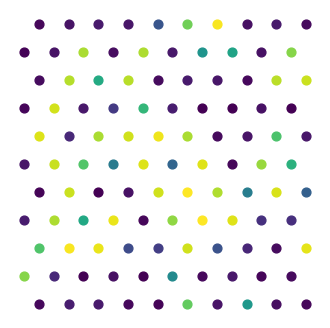

In [143]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    activity = np.stack(bc_output["activity"].to_numpy())
    for a, b, c in zip(bc_output["x_loc"].to_numpy(), bc_output["y_loc"].to_numpy(), activity[:, 0]):
        cmap = mpl.colormaps['viridis']
        _ = ax.scatter(a, b, s=40.0, color=cmap(c), zorder=10000)

    _ = ax.spines["left"].set_visible(False)
    _ = ax.spines["bottom"].set_visible(False)    
    _ = ax.set_xticks([])
    _ = ax.set_yticks([])
    plt.savefig("../svg/panel_a4_raw.svg", bbox_inches="tight")
    plt.show()

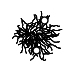

In [152]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(0.7, 0.7))
    ax = cell.vis(ax=ax, morph_plot_kwargs={"linewidth": 0.5})
    ax = cell.branch(recordings["branch_ind"].iloc[40].item()).loc(0.5).vis(ax=ax, col="w", morph_plot_kwargs={"zorder": 2000, "s": 25.0, "edgecolors": "k", "linewidth": 1.0})
    ax = cell.branch(recordings["branch_ind"].iloc[35].item()).loc(0.5).vis(ax=ax, col="w", morph_plot_kwargs={"zorder": 2000, "s": 25.0, "edgecolors": "k", "linewidth": 1.0})
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.savefig("../svg/panel_a5.svg", bbox_inches="tight", transparent=True)
    plt.show()

In [145]:
from nex.colors import cols as papercols

In [12]:
t = 60

In [14]:
ca = all_dfs.iloc[1]["Traces0_raw_noise"]
time_vec = all_dfs.iloc[1]["Tracetimes0_noise"]

with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(0.7, 0.15))
    _ = ax.plot(time_vec[:t], ca[:t], c=papercols["data"], linewidth=0.7)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    _ = ax.set_xticks([])
    _ = ax.set_yticks([])
    plt.savefig("../svg/panel_a6.svg", bbox_inches="tight", transparent=True)
    plt.show()

In [15]:
ca = all_dfs.iloc[3]["Traces0_raw_noise"]
time_vec = all_dfs.iloc[3]["Tracetimes0_noise"]

with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(0.7, 0.15))
    _ = ax.plot(time_vec[:t], ca[:t], c=papercols["data"], linewidth=0.7)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    _ = ax.set_xticks([])
    _ = ax.set_yticks([])
    plt.savefig("../svg/panel_a7.svg", bbox_inches="tight", transparent=True)
    plt.show()

# Loss illustration

In [219]:
with open(f"../results/02_loss/noise_image.pkl", "rb") as handle:
    noise_image = pickle.load(handle)

with open(f"../results/02_loss/v_and_cai.pkl", "rb") as handle:
    v_and_cai = pickle.load(handle)

with open(f"../results/02_loss/time_vec.pkl", "rb") as handle:
    time_vec = pickle.load(handle)

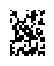

In [220]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(1.0, 0.6))
    _ = ax.imshow(noise_image.T, cmap="gray")
    _ = ax.spines["left"].set_visible(False)
    _ = ax.spines["bottom"].set_visible(False)
    _ = ax.set_xticks([])
    _ = ax.set_yticks([])
    plt.savefig("../svg/panel_b1.svg", bbox_inches="tight", transparent=True)
    plt.show()

In [221]:
# with mpl.rc_context(fname="../../../.matplotlibrc"):
#     fig, ax = plt.subplots(1, 1, figsize=(1.0, 0.3))
#     _ = ax.plot(time_vec, v_and_cai[30, :].T, c="k", alpha=0.5)
#     _ = ax.set_ylim([-90, 50])
#     _ = ax.set_xticklabels([])
#     _ = ax.spines["left"].set_visible(False)
#     _ = ax.spines["bottom"].set_visible(False)
#     _ = ax.set_xticks([])
#     _ = ax.set_yticks([])
#     plt.savefig("../svg/panel_b1.svg", bbox_inches="tight", transparent=True)
#     plt.show()

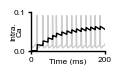

In [227]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(0.95, 0.5))
    _ = ax.plot(time_vec, v_and_cai[147 + 30, :].T, c="k")
    _ = ax.plot(time_vec, (v_and_cai[30, :].T + 80.0) / 1200, c="k", alpha=0.2)
    _ = ax.set_ylim([0, 0.1])
    # _ = ax.spines["left"].set_visible(False)
    # _ = ax.spines["bottom"].set_visible(False)
    # _ = ax.set_xticks([])
    # _ = ax.set_yticks([])
    _ = ax.set_xticks([0, 200])
    _ = ax.set_xlim([0, 200])
    _ = ax.set_xlabel("Time (ms)", labelpad=-3)
    _ = ax.set_ylabel("Intra.\nCa", labelpad=-7)
    _ = ax.set_yticks([0, 0.1])
    plt.savefig("../svg/panel_b2.svg", bbox_inches="tight", transparent=True)
    plt.show()

In [229]:
kernel = build_kernel(time_vec, 0.025)

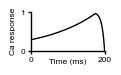

In [230]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(0.95, 0.5))
    _ = ax.plot(time_vec, np.flip(kernel), c="k")
    # _ = ax.spines["left"].set_visible(False)
    # _ = ax.spines["bottom"].set_visible(False)
    # _ = ax.set_xticks([])
    # _ = ax.set_yticks([])
    _ = ax.set_xticks([0, 200])
    _ = ax.set_xlim([0, 200.5])
    _ = ax.set_xlabel("Time (ms)", labelpad=-3)
    _ = ax.set_ylabel("Ca response", labelpad=3)
    _ = ax.set_yticks([0, 1])
    _ = ax.set_ylim([0, 1])
    plt.savefig("../svg/panel_b3.svg", bbox_inches="tight", transparent=True)
    plt.show()

# Result panels

In [4]:
with open("../results/03_results/roi_ids.pkl", "rb") as handle:
    roi_ids = pickle.load(handle)

with open("../results/03_results/all_masks.pkl", "rb") as handle:
    all_masks = pickle.load(handle)

with open("../results/03_results/all_ca_recordings.pkl", "rb") as handle:
    all_ca_recordings = pickle.load(handle)

with open("../results/03_results/all_ca_predictions.pkl", "rb") as handle:
    all_ca_predictions = pickle.load(handle)

In [5]:
good_ones = [2, 4, 14, 23, 24, 28, 32, 41, 57, 78, 81]
good_ones = [4, 23, 81]
middle_ones = [19, 24, 27]
bad_ones = [101, 120]
roi_inds = bad_ones + middle_ones + good_ones
_ = np.random.seed(7)
roi_inds = np.random.permutation(roi_inds)

In [6]:
rhos = []
for roi_id in np.arange(147).astype(int):
    roi_was_measured = all_masks[:, roi_id].astype(bool)

    rho_trained = np.corrcoef(
        all_ca_recordings[roi_was_measured, roi_id], 
        all_ca_predictions[roi_was_measured, roi_id]
    )[0, 1]
    rhos.append(rho_trained)
rhos = np.asarray(rhos)

print("Averge rho", np.mean(rhos))
print("Averge rho", np.max(rhos))
print("Averge rho", np.mean(rhos > 0.0))

Averge rho 0.25204641233944547
Averge rho 0.46443021518596933
Averge rho 1.0


rho_trained 0.15187432400983134
rho_trained 0.4287882778956166
rho_trained 0.15215004929414996
rho_trained 0.4474484472358054
rho_trained 0.3985584083303386
rho_trained 0.12222876337696816
rho_trained 0.32512175939203797
rho_trained 0.45532132689068405


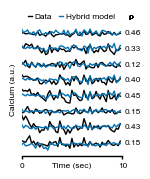

In [7]:
num = 50

with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(1.3, 1.73))

    for i, roi_id in enumerate(roi_inds):#roi_ids[:-7]
        roi_was_measured = all_masks[:, roi_id].astype(bool)
    
        rho_trained = np.corrcoef(
            all_ca_recordings[roi_was_measured, roi_id], 
            all_ca_predictions[roi_was_measured, roi_id]
        )[0, 1]
        print("rho_trained", rho_trained)

        spacing = 5.0
        _ = ax.plot(all_ca_recordings[roi_was_measured, roi_id][:num] + spacing * i, c=papercols["data"])
        _ = ax.plot(all_ca_predictions[roi_was_measured, roi_id][:num] * 2.5 + 0.5 + spacing * i, c=papercols["jaxley"])
        _ = ax.text(
            num + 3.0, 
            spacing * 8.16 - 1.0, 
            r"$\rho$",
        )
        _ = ax.text(
            num+1, 
            spacing * i - 0.5, 
            f"{rho_trained:.2f}",
        )
    
    _ = ax.legend(
        ["Data", "Hybrid model"], 
        loc="upper right", 
        bbox_to_anchor=[1.0, 1.13, 0.0, 0.0],
        ncol=2,
        handlelength=0.5,
        handletextpad=0.3,
        columnspacing=0.8, 
    )

    _ = ax.set_ylabel("Calcium (a.u.)")
    _ = ax.set_xlabel("Time (sec)", labelpad=-4)
    _ = ax.set_yticks([])
    _ = ax.set_xticks([0, num])
    _ = ax.set_xticklabels([0, int(num*200 / 1000)])
    _ = ax.set_xlim([0, num])
    _ = ax.spines["left"].set_visible(False)
    plt.subplots_adjust(hspace=0.7)
    plt.savefig("../svg/panel_c.svg", bbox_inches="tight", transparent=True)
    plt.show()

In [8]:
with open(f"../results/03_results/compartemtalization_stim_branches.pkl", "rb") as handle:
    stim_branches_save = pickle.load(handle)

with open(f"../results/03_results/compartemtalization_stim_comps.pkl", "rb") as handle:
    stim_comps_save = pickle.load(handle)

cell_id = "20161028_1"
cell = jx.read_swc(f"../data/{cell_id}.swc", nseg=4, max_branch_len=300.0, min_radius=5.0)

/Users/michaeldeistler/Documents/phd/jaxley/jaxley/utils/swc.py:32: UserWarning: Found a soma which consists of a single traced point. `Jaxley` interprets this soma as a spherical compartment with radius specified in the SWC file, i.e. with surface area 4*pi*r*r.
  warn(
/Users/michaeldeistler/Documents/phd/jaxley/jaxley/utils/swc.py:51: UserWarning: Found a segment with length 0. Clipping it to 1.0
  warn("Found a segment with length 0. Clipping it to 1.0")


In [9]:
import matplotlib.colors as colors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap = plt.get_cmap('viridis')
cmap = truncate_colormap(cmap, 0.0, 0.95)

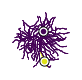

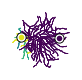

In [10]:
otherside_inds = [80, 78]

cols_close = []
cols_far = []
for i in range(2):
    with open(f"../results/03_results/compartemtalization_ca_{i}.pkl", "rb") as handle:
        ca = pickle.load(handle)

    calcium = ca
    calcium /= 0.01
    calcium = calcium[0]  # Remove batch dim
    
    with mpl.rc_context(fname="../../../.matplotlibrc"):
        fig, ax = plt.subplots(1, 1, figsize=(0.8, 0.78))
        for b in range(155):
            color = cmap(calcium[b])
            ax = cell.branch(b).vis(ax=ax, col=color, morph_plot_kwargs={"zorder": 1000, "linewidth": 0.5})

        col_close = cmap(calcium[stim_branches_save[i]])
        col_far = cmap(calcium[otherside_inds[i]])
        cols_close.append(col_close)
        cols_far.append(col_far)
        
        # Visualize stimulus.
        b = stim_branches_save[i]
        c = stim_comps_save[i]
        plot_kwargs = {"zorder": 10000, "s": 25.0, "edgecolors": "w", "linewidth": 1.0}
        ax = cell.branch(b).loc(c).vis(
            ax=ax,
            col=col_close, 
            morph_plot_kwargs=plot_kwargs,
        )
        ax = cell.branch(otherside_inds[i]).loc(0.3).vis(
            ax=ax, 
            col=col_far, 
            morph_plot_kwargs=plot_kwargs,
        )
        plot_kwargs_outer = {"zorder": 9000, "s": 40.0}
        ax = cell.branch(b).loc(c).vis(
            ax=ax, 
            col="k", 
            morph_plot_kwargs=plot_kwargs_outer,
        )
        ax = cell.branch(otherside_inds[i]).loc(0.3).vis(
            ax=ax, 
            col="k", 
            morph_plot_kwargs=plot_kwargs_outer,
        )

        _ = ax.spines["left"].set_visible(False)
        _ = ax.spines["bottom"].set_visible(False)
        _ = ax.set_xticks([])
        _ = ax.set_yticks([])
        plt.savefig(f"../svg/panel_d{i+1}.svg", bbox_inches="tight", transparent=True)

        plt.show()

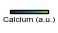

In [11]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    a = np.array([[0,1]])
    plt.figure(figsize=(0.48, 0.05))
    img = plt.imshow(a, cmap=cmap)
    plt.gca().set_visible(False)
    cax = plt.axes([0.1, 0.2, 0.8, 0.6])
    cbar = plt.colorbar(cax=cax, ticks=[], orientation='horizontal')
    cbar.set_label("Calcium (a.u.)", labelpad=3)
    plt.savefig("../svg/panel_d0.svg", bbox_inches="tight", transparent=True)
    plt.show()

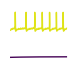

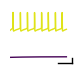

In [12]:
time_vec = np.arange(0, 200.1, 0.025)
for i in range(2):
    with open(f"../results/03_results/compartemtalization_v_{i}.pkl", "rb") as handle:
        v_and_ca = pickle.load(handle)

    with mpl.rc_context(fname="../../../.matplotlibrc"):
        fig, ax = plt.subplots(2, 1, figsize=(0.8, 0.7))

        # Visualize stimulus.
        b = stim_branches_save[i]
        v_close = v_and_ca[0, b + 155]
        v_far = v_and_ca[0, otherside_inds[i] + 155]

        _ = ax[0].plot(time_vec, v_close, c=cols_close[i])
        _ = ax[1].plot(time_vec, v_far, c=cols_far[i])

        if i == 1:
            _ = ax[1].plot([170, 220], [-100, -100], c="k", clip_on=False)
            _ = ax[1].plot([220, 220], [-70, -100], c="k", clip_on=False)
        for j in range(2):
            _ = ax[j].spines["left"].set_visible(False)
            _ = ax[j].spines["bottom"].set_visible(False)
            _ = ax[j].set_xticks([])
            _ = ax[j].set_yticks([])
            _ = ax[j].set_xlim([0, 220])
            _ = ax[j].set_ylim([-100, 50])
        plt.subplots_adjust(hspace=0.0)
        plt.savefig(f"../svg/panel_d{i+3}.svg", bbox_inches="tight", transparent=True)
        plt.show()

/var/folders/kv/39t9blx569l5_sxxzx89vb3c0000gn/T/ipykernel_11754/4290272577.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('viridis')


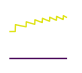

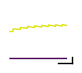

In [13]:
cmap = mpl.cm.get_cmap('viridis')

for i in range(2):
    with open(f"../results/03_results/compartemtalization_v_{i}.pkl", "rb") as handle:
        v_and_ca = pickle.load(handle)

    with mpl.rc_context(fname="../../../.matplotlibrc"):
        fig, ax = plt.subplots(2, 1, figsize=(0.8, 0.7))

        # Visualize stimulus.
        b = stim_branches_save[i]
        v_close = v_and_ca[0, b]
        v_far = v_and_ca[0, 10]

        _ = ax[0].plot(time_vec, v_close, c=cols_close[i], clip_on=False)
        _ = ax[1].plot(time_vec, v_far, c=cols_far[i], clip_on=False)
        if i == 1:
            _ = ax[1].plot([170, 220], [-0.02, -0.02], c="k", clip_on=False)
            _ = ax[1].plot([220, 220], [-0.02, 0.005], c="k", clip_on=False)
        for j in range(2):
            _ = ax[j].spines["left"].set_visible(False)
            _ = ax[j].spines["bottom"].set_visible(False)
            _ = ax[j].set_xticks([])
            _ = ax[j].set_yticks([])
            _ = ax[j].set_xlim([0, 220])
            _ = ax[j].set_ylim([-0.02, 0.1])
        plt.subplots_adjust(hspace=0.0)
        plt.savefig(f"../svg/panel_d{i+5}.svg", bbox_inches="tight", transparent=True)
        plt.show()

### Receptive fields

In [6]:
from nex.rgc.utils.data_utils import read_data

with open(f"../results/03_results/rfs_trained.pkl", "rb") as handle:
    rfs_trained = pickle.load(handle)

with open(f"../results/03_results/avg_recordings.pkl", "rb") as handle:
    avg_recordings = pickle.load(handle)

with open(f"../results/03_results/setup.pkl", "rb") as handle:
    setup = pickle.load(handle)

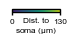

In [15]:
cmap = plt.get_cmap('viridis')
cmap = truncate_colormap(cmap, 0.1, 0.95)

with mpl.rc_context(fname="../../../.matplotlibrc"):
    a = np.array([[0,130]])
    plt.figure(figsize=(0.6, 0.05))
    img = plt.imshow(a, cmap=cmap)
    plt.gca().set_visible(False)
    cax = plt.axes([0.1, 0.2, 0.8, 0.6])
    cbar = plt.colorbar(cax=cax, ticks=[0, 130], orientation='horizontal')
    cbar.set_label("Dist. to\nsoma (" + r"$\mu$" + "m)", labelpad=-5)
    plt.savefig("../svg/panel_e0.svg", bbox_inches="tight", transparent=True)
    plt.show()

In [16]:
avg_recordings["roi_id"] = avg_recordings["roi_id"].astype(int)
rec_and_roi = avg_recordings[["rec_id", "roi_id"]].to_numpy()
rec_ids_of_all_rois = rec_and_roi[:, 0]
roi_ids_of_all_rois = rec_and_roi[:, 1]
avg_recordings = avg_recordings.reset_index()

counters = np.arange(0, 147, 1)
center = np.asarray([170, 150])
pixel_size = 30
levels = [0.4]
upsample_factor = 20
output_shape = (np.array([20, 15]) * upsample_factor).astype(int)

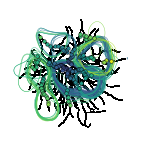

In [123]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(1.6, 1.7))

    for i, counter in enumerate(counters):
        ax = cell.vis(ax=ax, col="k", morph_plot_kwargs={"zorder": 1000, "linewidth": 0.5})

        rec_id = rec_ids_of_all_rois[counter]
        roi_id = roi_ids_of_all_rois[counter]
        rf_pred = rfs_trained[counter]
        setup_rec = setup[setup["rec_id"] == rec_id]
        offset_x = setup_rec["image_center_x"].to_numpy()[0]
        offset_y = setup_rec["image_center_y"].to_numpy()[0]

        im_pos_x = (np.linspace(-7.0 * pixel_size, 7.0 * pixel_size, 15 * upsample_factor)+ offset_x)
        im_pos_y = (-np.linspace(-9.5 * pixel_size, 9.5 * pixel_size, 20 * upsample_factor) + offset_y)
        image_xs, image_ys = np.meshgrid(im_pos_x, im_pos_y)

        rec = avg_recordings.loc[counter]
        dist = np.sqrt(np.sum((cell.xyzr[0][0, :3] - np.asarray([rec["roi_x"].item(), rec["roi_y"].item(), rec["roi_z"].item()])) ** 2))
        col = cmap(dist / 130)

        _ = ax.scatter(
            rec["roi_x"].item(),
            rec["roi_y"].item(),
            color=col,
            s=7.0,
            edgecolors="k",
            linewidths=0.3,
            zorder=10000,
        )

        upsampled_rf = resize(rf_pred, output_shape=output_shape, order=3, mode="constant")
        # Remove spurious RF bugs that come from upsampling.
        upsampled_rf[:5, :] = 1.0
        upsampled_rf[-5:, :] = 1.0
        upsampled_rf[:, :5] = 1.0
        upsampled_rf[:, -5:] = 1.0
        _ = ax.contour(
            image_xs,
            image_ys,
            upsampled_rf,
            levels=levels,
            colors=[col],
            linestyles="solid",
            linewidths=0.3,
            zorder=2_000,
        )

    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    _ = ax.set_xticks([])
    _ = ax.set_yticks([])
    _ = ax.set_xlim([center[0] - pixel_size * 5, center[0] + pixel_size * 6.48])
    _ = ax.set_ylim([center[1] - pixel_size * 5.5, center[1] + pixel_size * 5.48])

    plt.savefig("../svg/panel_e1.svg", bbox_inches="tight", transparent=True)
    plt.savefig("../svg/panel_e1_png.png", dpi=400, bbox_inches="tight", transparent=True)
    plt.show()

### Inductive bias / performance

In [14]:
import scipy
import os

results_path = "../../../nex/rgc/results/train_runs"
dataset_sizes = np.asarray([544, 576, 640, 768, 1024]) - 512

In [8]:
from copy import deepcopy

runs = []

### 32 and 64
run1 = "2024_08_03__10_50_00_m"
run2 = "2024_08_03__20_53_23_m"
run3 = "2024_08_04__06_13_41_m"
run5 = "2024_08_05__05_44_26_m"

# 32
run7 = "2024_08_11__19_38_09_m"
run9 = "2024_08_11__09_29_06_m"
run13 = "2024_08_14__11_35_06_m"
runs += deepcopy([run1, run2, run3, run5, run7, run9, run13])

# 64
run7 = "2024_08_10__21_13_47_m"
run9 = "2024_08_10__09_02_52_m"
run13 = "2024_08_14__09_59_04_m"
runs += deepcopy([run7, run9, run13])

### 128
run1 = "2024_08_07__08_02_33_m"
run2 = "2024_08_07__09_36_30_m"
run3 = "2024_08_07__11_08_51_m"
run5 = "2024_08_07__18_58_23_m"
run7 = "2024_08_10__07_07_31_m"
run9 = "2024_08_09__21_27_57_m"
run13 = "2024_08_14__06_15_31_m"
runs += deepcopy([run1, run2, run3, run5, run7, run9, run13])

### 256
run1 = "2024_08_07__21_08_56_m"
run2 = "2024_08_08__08_24_19_m"
run3 = "2024_08_08__09_45_47_m"
run7 = "2024_08_09__19_56_38_m"
run9 = "2024_08_09__16_16_33_m"
run13 = "2024_08_13__20_45_26_m"
runs += deepcopy([run1, run2, run3, run5, run7, run9, run13])

### 512
run1 = "2024_08_08__16_21_36_m"
run2 = "2024_08_08__19_50_17_m"
run3 = "2024_08_08__21_28_52_m"
run7 = "2024_08_09__12_23_16_m"
run9 = "2024_08_09__14_41_21_m"
run13 = "2024_08_13__18_16_54_m"
runs += deepcopy([run1, run2, run4, run5, run7, run9, run13])

In [9]:
setup_runs = []
for run_id in runs:
    all_dirs = os.listdir(f"{results_path}/{run_id}")
    all_dirs = [m for m in all_dirs if len(m) == 1]
    all_dirs = [d for d in all_dirs if d in ["0", "1"]]
    for setup_run in all_dirs:
        setup_runs.append(f"{results_path}/{run_id}/{setup_run}")

In [10]:
import yaml

results = {"seed": [], "val_rho": [], "test_rho": [], "train_rho": [], "ndata": []}
for run in setup_runs:
    config = yaml.safe_load(open(f"{run}/.hydra/overrides.yaml"))
    seed_config = config[-2]
    assert seed_config.startswith("seed_ruler")
    results["seed"].append(int(seed_config[-1]))

    ndata_config = config[2]
    assert ndata_config.startswith("num_datapoints_per_scanfield")
    results["ndata"].append(int(ndata_config[29:]) - 512)

    for name in ["train", "test", "val"]:
        with open(f"{run}/rhos/{name}_rho.pkl", "rb") as handle:
            rho = pickle.load(handle)
        results[f"{name}_rho"].append(rho)

results = pd.DataFrame().from_dict(results).sort_values(by="ndata")
av_per_ndata = results.groupby("ndata").mean()
sem_per_ndata = results.groupby("ndata").sem()
av_per_ndata = av_per_ndata[av_per_ndata.index.isin(dataset_sizes)]
sem_per_ndata = sem_per_ndata[sem_per_ndata.index.isin(dataset_sizes)]

In [11]:
def averge_accuracies_across_rec(accuracies):
    recs = [1, 2, 3, 5, 7, 9, 13]
    for rec in recs:
        for key in ["train", "test"]:
            accuracies[rec][key] = np.asarray(accuracies[rec][key])
            
    avg_accuracies = accuracies[1]
    for rec in recs[1:]:
        for key in ["train", "test"]:
            avg_accuracies[key] += accuracies[rec][key]
    
    for key in ["train", "test"]:
        avg_accuracies[key] /= len(recs)
    return avg_accuracies

In [12]:
d_on_d = {"test": [], "train": []}
for split in ["train", "test"]:
    for i in dataset_sizes:
        d_on_d[split].append(av_per_ndata.loc[i, f"{split}_rho"])

with open(f"../results/05_ann_inductive_bias/linreg_accuracies.pkl", "rb") as handle:
    linreg_accuracies_all = pickle.load(handle)

with open(f"../results/05_ann_inductive_bias/ann_accuracies.pkl", "rb") as handle:
    ann_accuracies_all = pickle.load(handle)

linreg_accuracies = averge_accuracies_across_rec(linreg_accuracies_all)
ann_accuracies = averge_accuracies_across_rec(ann_accuracies_all)

In [15]:
sems_train_ann = []
sems_test_ann = []
for n_data_index in range(5):
    vals_train = [ann_accuracies_all[k]["train"][n_data_index] for k in ann_accuracies_all.keys()]
    vals_test = [ann_accuracies_all[k]["test"][n_data_index] for k in ann_accuracies_all.keys()]
    sems_train_ann.append(scipy.stats.sem(vals_train))
    sems_test_ann.append(scipy.stats.sem(vals_test))

sems_train_linreg = []
sems_test_linreg = []
for n_data_index in range(5):
    vals_train = [linreg_accuracies_all[k]["train"][n_data_index] for k in linreg_accuracies_all.keys()]
    vals_test = [linreg_accuracies_all[k]["test"][n_data_index] for k in linreg_accuracies_all.keys()]
    sems_train_linreg.append(scipy.stats.sem(vals_train))
    sems_test_linreg.append(scipy.stats.sem(vals_test))

In [16]:
import scipy

all_n_data = np.asarray([32, 64, 128, 256, 512])
for n_data in all_n_data:
    print("ndata", n_data)
    ind = np.where(all_n_data == n_data)[0][0]
    hybrid = results[results["ndata"] == n_data]
    hybrid = hybrid["test_rho"].to_numpy()
    ann = np.asarray([ann_accuracies_all[k]["test"][ind] for k in ann_accuracies_all.keys()])
    
    print("pvalue vs ann", scipy.stats.ttest_ind(hybrid, ann, alternative="greater").pvalue * 100)
    
    ann = np.asarray([linreg_accuracies_all[k]["test"][ind] for k in linreg_accuracies_all.keys()])
    print("pvalue vs linreg", scipy.stats.ttest_ind(hybrid, ann, alternative="greater").pvalue * 100)

ndata 32
pvalue vs ann 0.30489252566592884
pvalue vs linreg 0.039185544126971186
ndata 64
pvalue vs ann 0.43684184629854667
pvalue vs linreg 0.26516552559444195
ndata 128
pvalue vs ann 1.7272083514546763
pvalue vs linreg 0.19772603385659887
ndata 256
pvalue vs ann 6.565083170223036
pvalue vs linreg 0.5576586238271116
ndata 512
pvalue vs ann 80.02759468455577
pvalue vs linreg 24.916460486415826


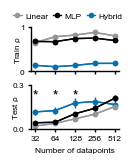

In [19]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(2, 1, figsize=(1.13, 1.32))
    ndata = dataset_sizes

    for i, split in enumerate(["train", "test"]):
        ax[i].plot(np.arange(len(ndata)), np.asarray(linreg_accuracies[split]), marker="o", c="#969696")
        ax[i].plot(np.arange(len(ndata)), np.asarray(ann_accuracies[split]), marker="o", c=papercols["genetic_alg"])
        ax[i].plot(np.arange(len(ndata)), np.asarray(d_on_d[split][:len(ndata)]), marker="o", c=papercols["jaxley"])

        ax[i].errorbar(np.arange(len(ndata)), np.asarray(d_on_d[split][:len(ndata)]), yerr=sem_per_ndata[f"{split}_rho"][:len(ndata)], marker="o", c=papercols["jaxley"])

    ax[0].errorbar(np.arange(len(ndata)), np.asarray(linreg_accuracies["train"]), yerr=sems_train_linreg, marker="o", c="#969696")
    ax[0].errorbar(np.arange(len(ndata)), np.asarray(ann_accuracies["train"]), yerr=sems_train_ann, marker="o", c=papercols["genetic_alg"])
    ax[1].errorbar(np.arange(len(ndata)), np.asarray(linreg_accuracies["test"]), yerr=sems_test_linreg, marker="o", c="#969696")
    ax[1].errorbar(np.arange(len(ndata)), np.asarray(ann_accuracies["test"]), yerr=sems_test_ann, marker="o", c=papercols["genetic_alg"])

    # Star for statistical signifcance.
    _ = ax[1].text(-0.12, 0.2, "*", fontsize=10.0)
    _ = ax[1].text(0.87, 0.2, "*", fontsize=10.0)
    _ = ax[1].text(1.86, 0.2, "*", fontsize=10.0)
    
    for i in range(2):
        ax[i].set_xticks(np.arange(len(ndata)))
    ax[0].set_yticks([0, 1])
    ax[0].set_ylim([0, 1])
    ax[1].set_yticks([0, 0.3])
    ax[1].set_ylim([0, 0.3])
    _ = ax[0].set_xticklabels([])
    _ = ax[1].set_xticklabels(ndata)
    _ = ax[1].set_xlabel("Number of datapoints")
    _ = ax[0].set_ylabel("Train " + r"$\rho$", labelpad=-2)
    _ = ax[1].set_ylabel("Test " + r"$\rho$", labelpad=-6)
    ax[0].legend(
        ["Linear", "MLP", "Hybrid"], 
        loc="upper right", 
        bbox_to_anchor=[1.13, 1.5, 0.0, 0.0],
        labelspacing=0.1,
        ncol=3,
        handletextpad=0.4,
        handlelength=1.0,
        columnspacing=0.6,
    )
    plt.subplots_adjust(hspace=0.3)
    plt.savefig(f"../svg/panel_f.svg", bbox_inches="tight", transparent=True)
    plt.show()

# Assemble figure

### Assemble row 1

In [23]:
def svg(img):
    IPd.display(IPd.HTML('<img src="{}" / >'.format(img, time.time())))

svg_scale = 1.334  # set this to 1.334 for Inkscape, 1.0 otherwise

# Panel letters in Helvetica Neue, 12pt, Medium
kwargs_text = {'size': '8pt', 'font': 'Arial', 'weight': '800'}
kwargs_text_normal = {'size': '6pt', 'font': 'Arial'}

f = Figure(
    "8.0cm",
    "2.6cm",
    
    Panel(
        SVG("../svg/panel_a1.svg").scale(svg_scale * 0.58),
        Text("a", -5, -12.0, **kwargs_text),
        Text("Hybrid statistical/biophysical model of the retina", 38, -12.0, **kwargs_text_normal),
    ).move(5, 20),
    Panel(SVG("../svg/panel_a2.svg").scale(svg_scale)).move(14, 10),
    Panel(SVG("../svg/panel_a3.svg").scale(svg_scale)).move(95, 33),
    Panel(SVG("../svg/panel_a4.svg").scale(svg_scale * 0.35)).move(170, 20),
    Panel(SVG("../svg/panel_a5.svg").scale(svg_scale)).move(195, 20),
    Panel(SVG("../svg/panel_a6.svg").scale(svg_scale)).move(195, 12),
    Panel(SVG("../svg/panel_a7.svg").scale(svg_scale)).move(195, 72),

    Text("Stimulus", 2, 20.0, **kwargs_text_normal),
    Text("PRs", 55, 20.0, **kwargs_text_normal),
    Text("BCs", 123, 20.0, **kwargs_text_normal),
    Text("BC activity", 160, 20.0, **kwargs_text_normal),
    Text("RGC", 220, 20.0, **kwargs_text_normal),

    Line(((235.0, 43.0), (210.0, 32.0)), color="#000000"),
    Line(((240.0, 42.0), (250.0, 32.0)), color="#000000"),
    Line(((226.4, 68.1), (210.0, 82.0)), color="#000000"),
    Line(((233, 68), (250.0, 82.0)), color="#000000"),
)

!mkdir -p fig
f.save("../svg/panel_a_assembled.svg")
svg("../svg/panel_a_assembled.svg")

In [79]:
def svg(img):
    IPd.display(IPd.HTML('<img src="{}" / >'.format(img, time.time())))

svg_scale = 1.334  # set this to 1.334 for Inkscape, 1.0 otherwise

# Panel letters in Helvetica Neue, 12pt, Medium
kwargs_text = {'size': '8pt', 'font': 'Arial', 'weight': '800'}
kwargs_text_normal = {'size': '6pt', 'font': 'Arial'}

f = Figure(
    "10.1cm",
    "2.5cm",

    Panel(
        SVG("../svg/panel_a1.svg").scale(svg_scale * 0.58),
        Text("b", -5, -12.0, **kwargs_text),
        Text("Fitting the model to calcium recordings", 103, -12.0, **kwargs_text_normal),
    ).move(8, 20),
    Panel(Text("Model", 27, 50.0, **kwargs_text_normal)),
    Panel(Text("sum", 60, 55.0, **kwargs_text_normal)),
    Panel(SVG("../svg/panel_b2.svg").scale(svg_scale)).move(79, 20),
    Panel(SVG("../svg/panel_b3.svg").scale(svg_scale)).move(200, 20),
    Panel(Text("MAE(Ca2+)", 338.0, 55.0, **kwargs_text_normal)),

)

!mkdir -p fig
f.save("../svg/panel_b_assembled.svg")
svg("../svg/panel_b_assembled.svg")

### Assemble row 2

In [20]:
def svg(img):
    IPd.display(IPd.HTML('<img src="{}" / >'.format(img, time.time())))

svg_scale = 1.334  # set this to 1.334 for Inkscape, 1.0 otherwise

# Panel letters in Helvetica Neue, 12pt, Medium
kwargs_text = {'size': '8pt', 'font': 'Arial', 'weight': '800'}
kwargs_text_normal = {'size': '6pt', 'font': 'Arial'}

f = Figure(
    "18.0cm",
    "7.55cm",
    
    Panel(SVG("../svg/panel_a_annotated.svg")),
    # Panel(SVG("../svg/panel_a_assembled.svg")),

    Panel(SVG("../svg/panel_b_annotated.svg")).move(300, 00),
    # Panel(SVG("../svg/panel_b_assembled.svg")).move(300, 00),

    Panel(Text("c", 0, 135.0, **kwargs_text)),
    Panel(SVG("../svg/panel_c.svg").scale(svg_scale)).move(-5, 117),

    Panel(Text("d", 170, 135.0, **kwargs_text)),
    Panel(Text("Compartmentalized responses", 230, 135.0, **kwargs_text_normal)),
    Panel(Text("Voltage", 265, 150.0, **kwargs_text_normal)),
    Panel(Text("Intra. calcium", 333, 150.0, **kwargs_text_normal)),
    Panel(SVG("../svg/panel_d0.svg").scale(svg_scale)).move(170, 259),
    Panel(SVG("../svg/panel_d1.svg").scale(svg_scale)).move(160, 135),
    Panel(SVG("../svg/panel_d2.svg").scale(svg_scale)).move(160, 197),
    Panel(SVG("../svg/panel_d3.svg").scale(svg_scale)).move(240, 145),
    Panel(SVG("../svg/panel_d4.svg").scale(svg_scale)).move(240, 210),
    Panel(SVG("../svg/panel_d5.svg").scale(svg_scale)).move(320, 145),
    Panel(SVG("../svg/panel_d6.svg").scale(svg_scale)).move(320, 210),

    Panel(SVG("../svg/stim_sign.svg").scale(5.0)).move(191, 198),
    Panel(SVG("../svg/stim_sign.svg").scale(5.0)).move(163, 220),

    Panel(Text("e", 420, 135.0, **kwargs_text)),
    Panel(Text("Model receptive fields", 445, 135.0, **kwargs_text_normal)),
    Panel(SVG("../svg/panel_e0.svg").scale(svg_scale)).move(446, 248),
    Panel(SVG("../svg/panel_e1_png.svg").scale(1.77)).move(424, 142),

    Panel(Text("f", 565, 135.0, **kwargs_text)),
    Panel(Text("Inductive bias", 600, 135.0, **kwargs_text_normal)),
    Panel(SVG("../svg/panel_f.svg").scale(svg_scale)).move(555, 132),
)

!mkdir -p fig
f.save("../fig/fig4.svg")
svg("../fig/fig4.svg")

/Users/michaeldeistler/anaconda3/envs/nex/lib/python3.11/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()
